In [3]:
import pandas as pd

# Load the dataset
file_path = '../data/raw/Businesses_Canada_provinces_2015_2024.csv'
data = pd.read_csv(file_path)

# Extract the relevant data excluding the header row
data_cleaned = data.iloc[1:, 1:]
data_cleaned.columns = data.iloc[0, 1:]

# Set the business dynamics as the index
data_cleaned.index = data.iloc[1:, 0]

# Transpose the dataframe
data_transposed = data_cleaned.T

# Reset the index to make 'Date' a column
data_transposed.reset_index(inplace=True)
data_transposed.rename(columns={'index': 'Date'}, inplace=True)

# Rename the columns manually to fix any issues
data_transposed.columns = ['Date', 'Active businesses', 'Opening businesses', 'Closing businesses']

# Extract unique geography names from column headers, clean the names
province_columns = data.columns[1:]
cleaned_geographies = pd.Series(province_columns).str.extract(r'([^\d]+)')[0].str.replace(r'[^\w\s]', '', regex=True).str.strip().str.replace(r'\.$', '', regex=True).unique().tolist()

# Calculate the number of date columns per geography
num_dates_per_geography = len(data_transposed) // len(cleaned_geographies)

# Generate a list that maps each date to its respective geography
geography_list = []
for geo in cleaned_geographies:
    geography_list.extend([geo] * num_dates_per_geography)

# If there are any remaining columns, add them to the geography list
remaining_dates = len(data_transposed) % len(cleaned_geographies)
if remaining_dates:
    geography_list.extend(cleaned_geographies[:remaining_dates])

# Ensure the geography_list length matches the number of rows in the transposed data
data_transposed['Geography'] = geography_list[:len(data_transposed)]

# Reorder columns to place 'Geography' after 'Date'
columns_order = ['Date', 'Geography', 'Active businesses', 'Opening businesses', 'Closing businesses']
data_transposed = data_transposed[columns_order]

# Display the transformed dataframe
print(data_transposed.tail())

        Date         Geography Active businesses Opening businesses  \
1227  23-Dec  British Columbia           155,505              7,500   
1228  24-Jan  British Columbia           155,766              7,748   
1229  24-Feb  British Columbia           155,863              7,589   
1230  24-Mar  British Columbia           155,875              7,343   
1231  24-Apr  British Columbia           156,146              7,715   

     Closing businesses  
1227              7,608  
1228              7,404  
1229              7,465  
1230              7,509  
1231              7,516  


In [5]:
# Optionally, save the transformed dataframe to a CSV file
output_file_path = '../data/processed/Businesses_Canada_provinces_2015_2024.csv'
data_transposed.to_csv(output_file_path, index=False)


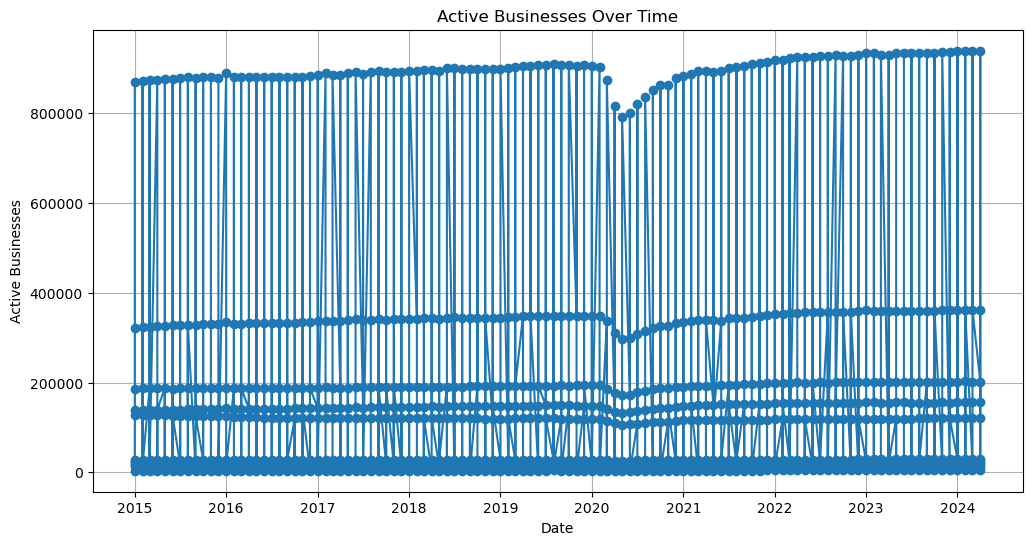

In [8]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

businesses_df = pd.read_csv(output_file_path)

# Convert the 'Date' column to datetime format for plotting
businesses_df['Date'] = pd.to_datetime(businesses_df['Date'], format='%y-%b')

# Sort the dataframe by date
businesses_df = businesses_df.sort_values(by='Date')

# Plot active businesses over time
plt.figure(figsize=(12, 6))
plt.plot(businesses_df['Date'], businesses_df['Active businesses'].str.replace(',', '').astype(int), marker='o')
plt.title('Active Businesses Over Time')
plt.xlabel('Date')
plt.ylabel('Active Businesses')
plt.grid(True)
plt.show()


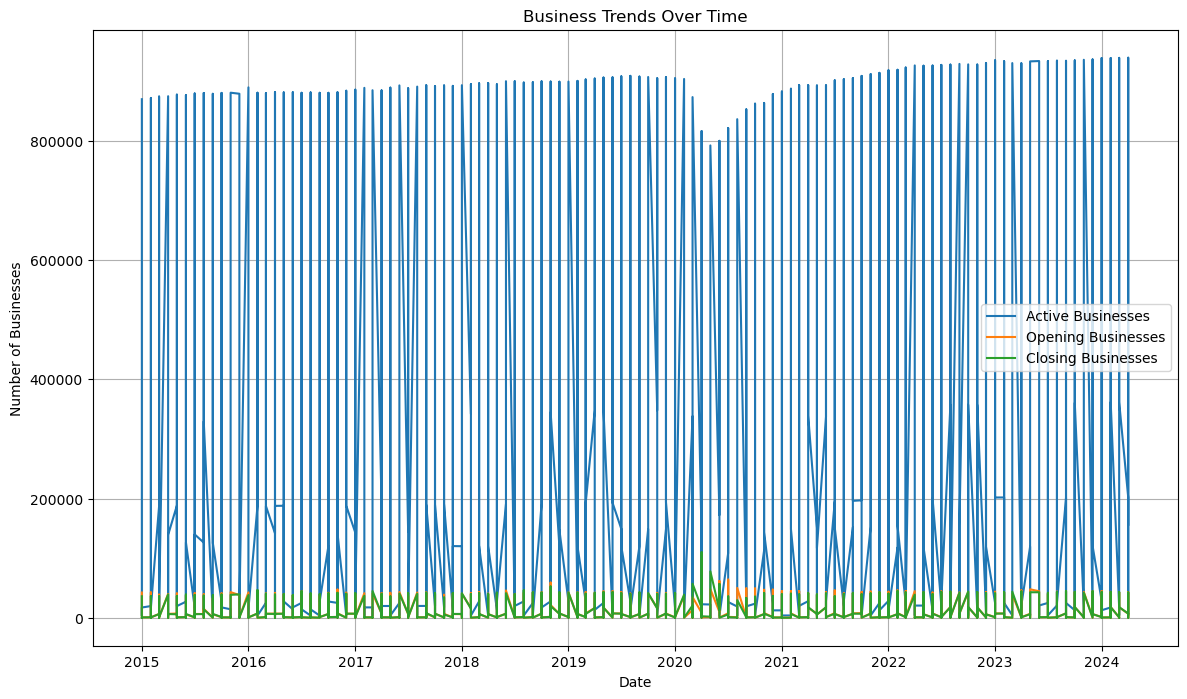

In [11]:
# Plot the trend lines over time
plt.figure(figsize=(14, 8))

# Plot trend line for active businesses
plt.plot(businesses_df['Date'], businesses_df['Active businesses'], label='Active Businesses')

# Plot trend line for opening businesses
plt.plot(businesses_df['Date'], businesses_df['Opening businesses'], label='Opening Businesses')

# Plot trend line for closing businesses
plt.plot(businesses_df['Date'], businesses_df['Closing businesses'], label='Closing Businesses')

# Adding titles and labels
plt.title('Business Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Businesses')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


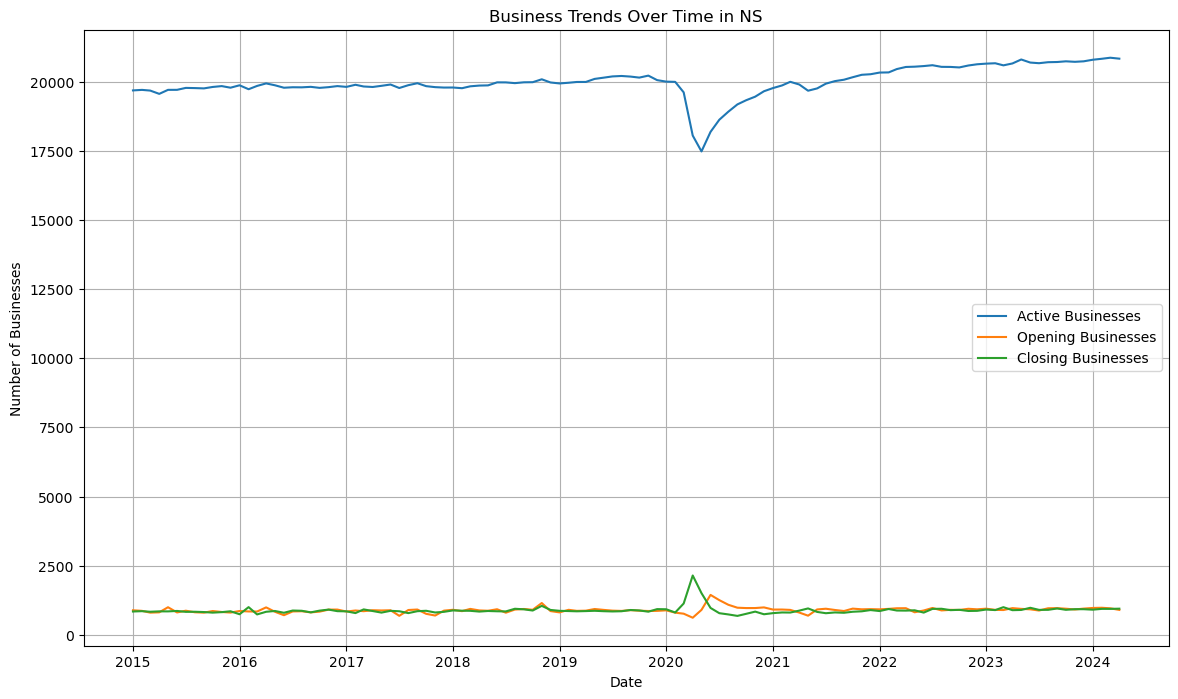

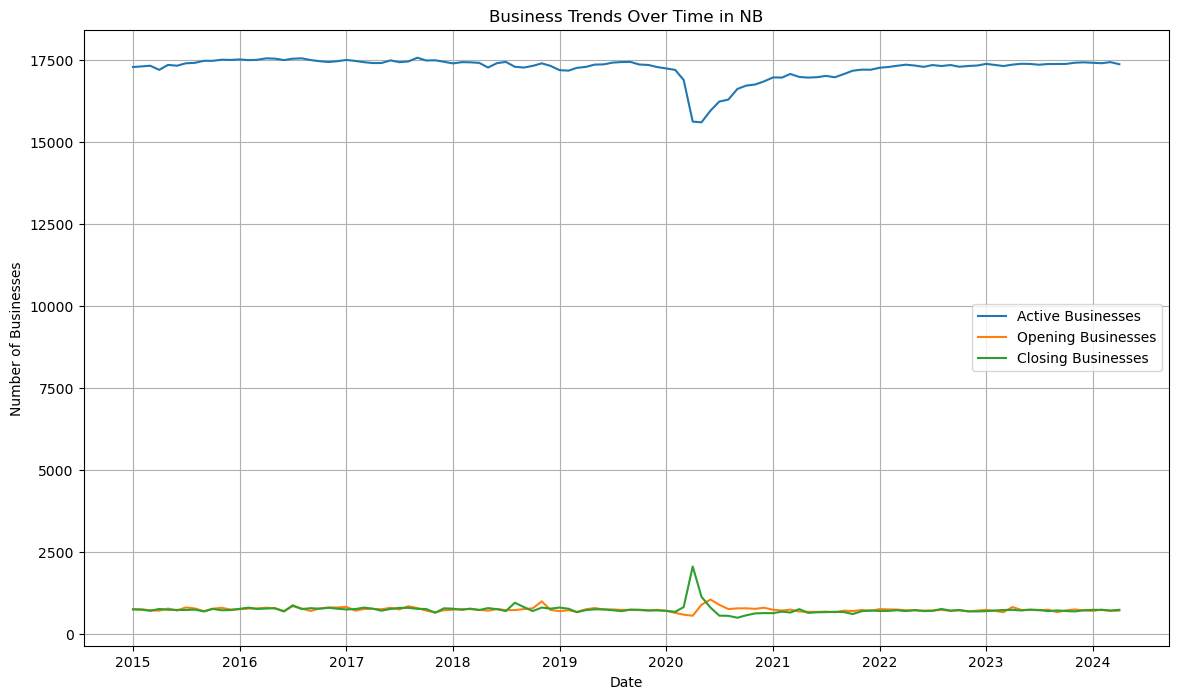

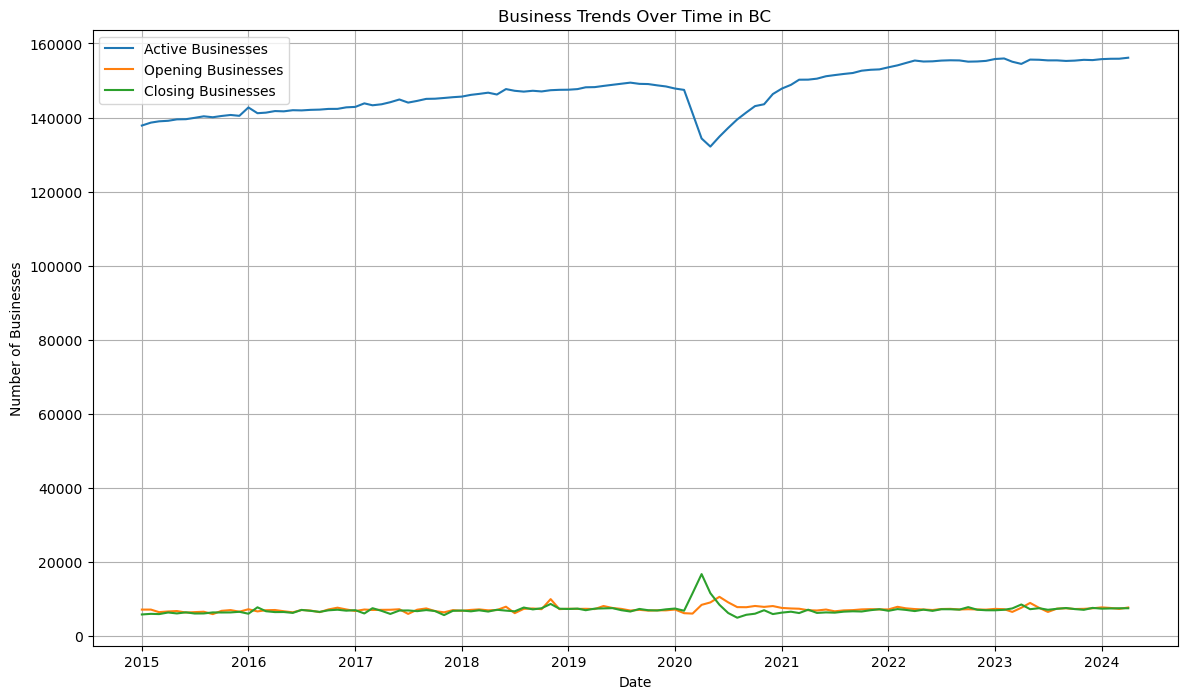

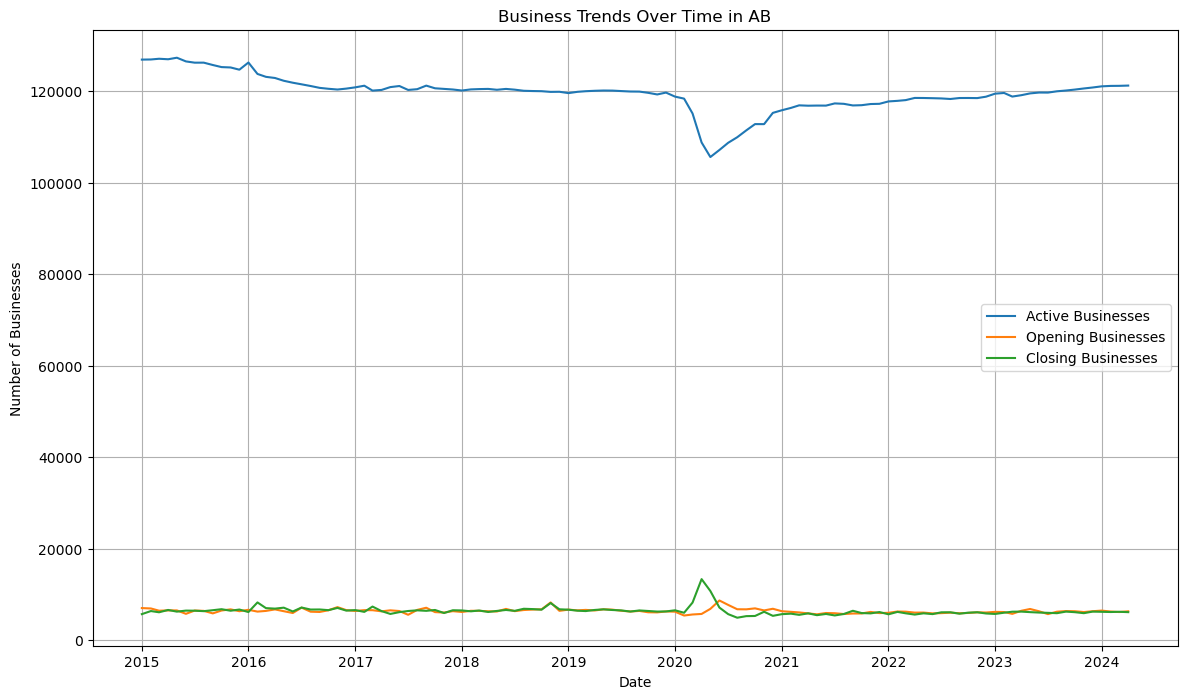

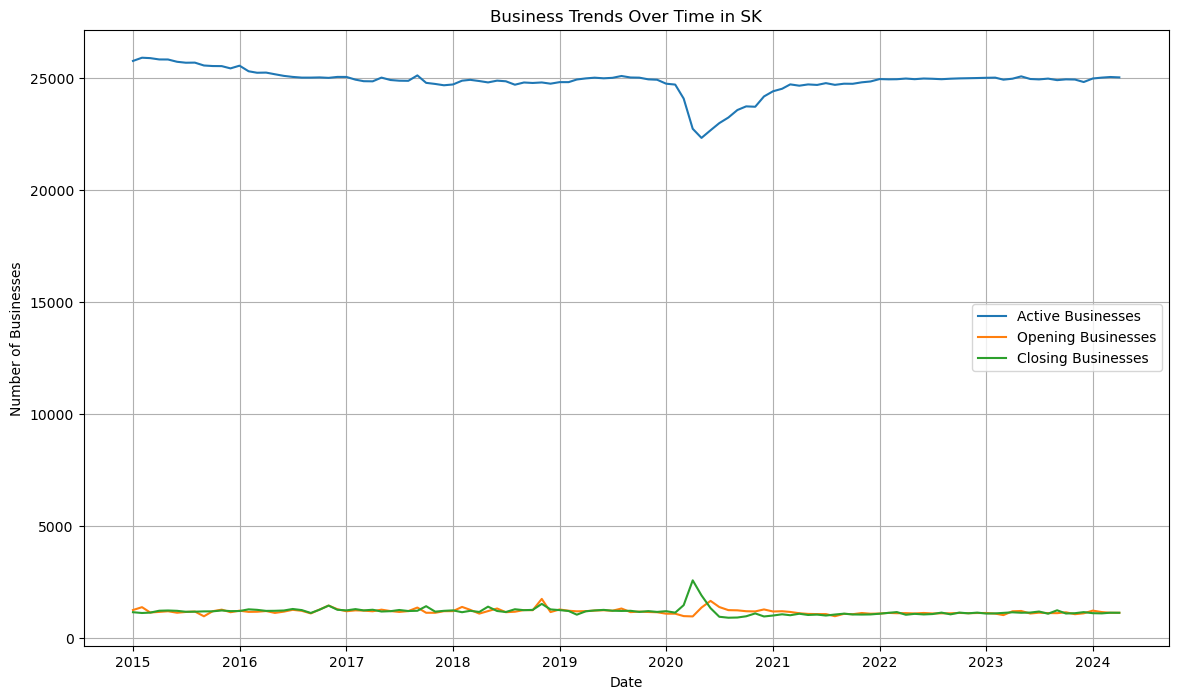

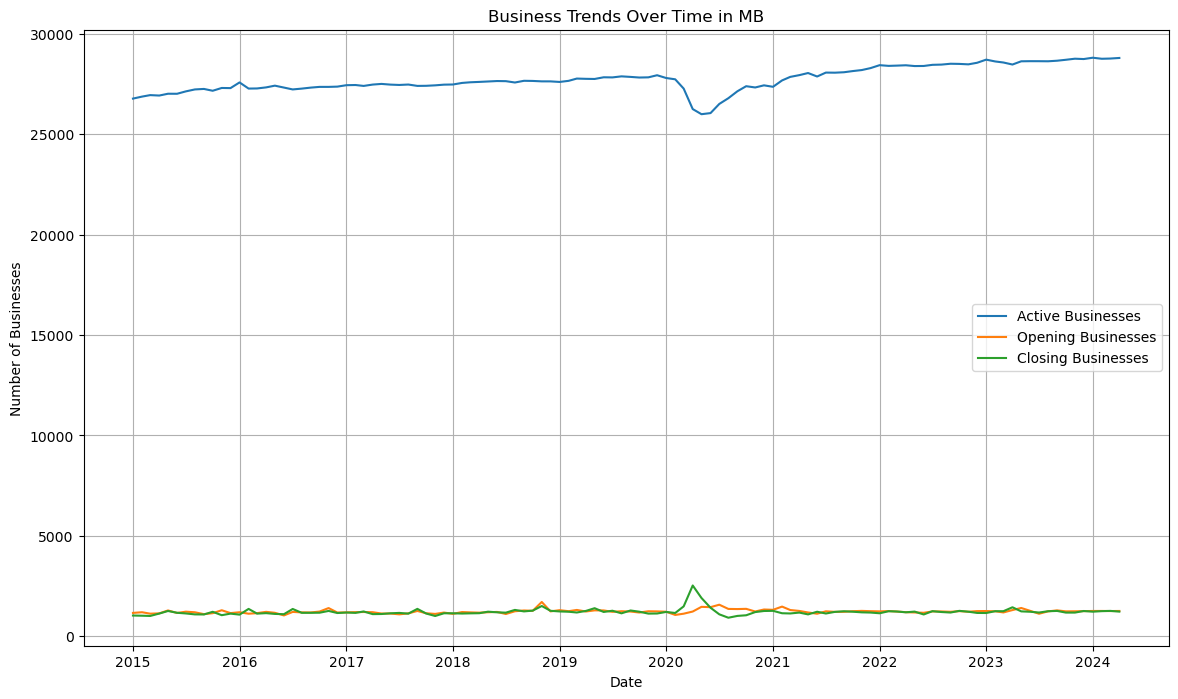

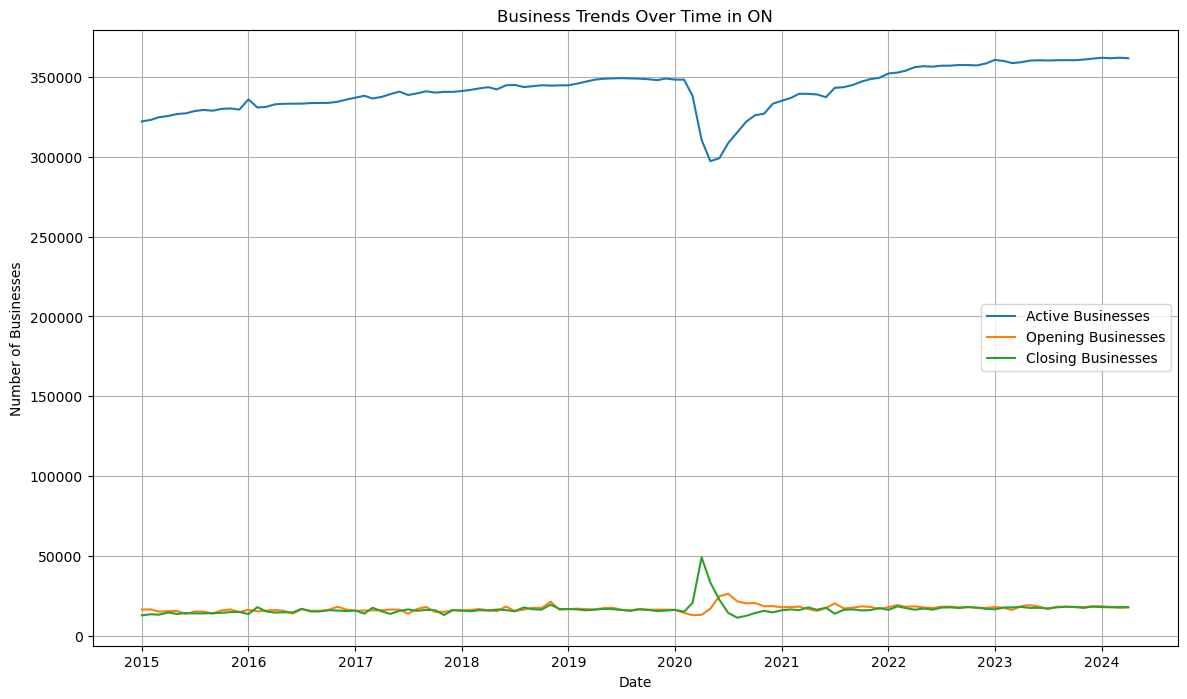

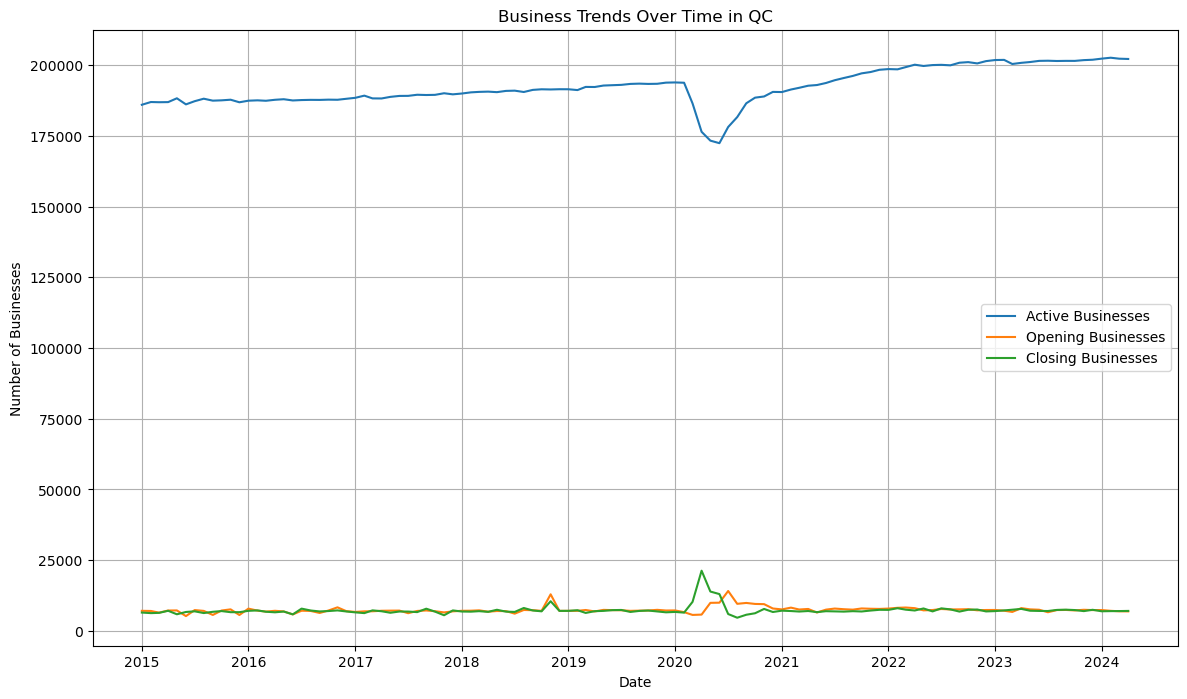

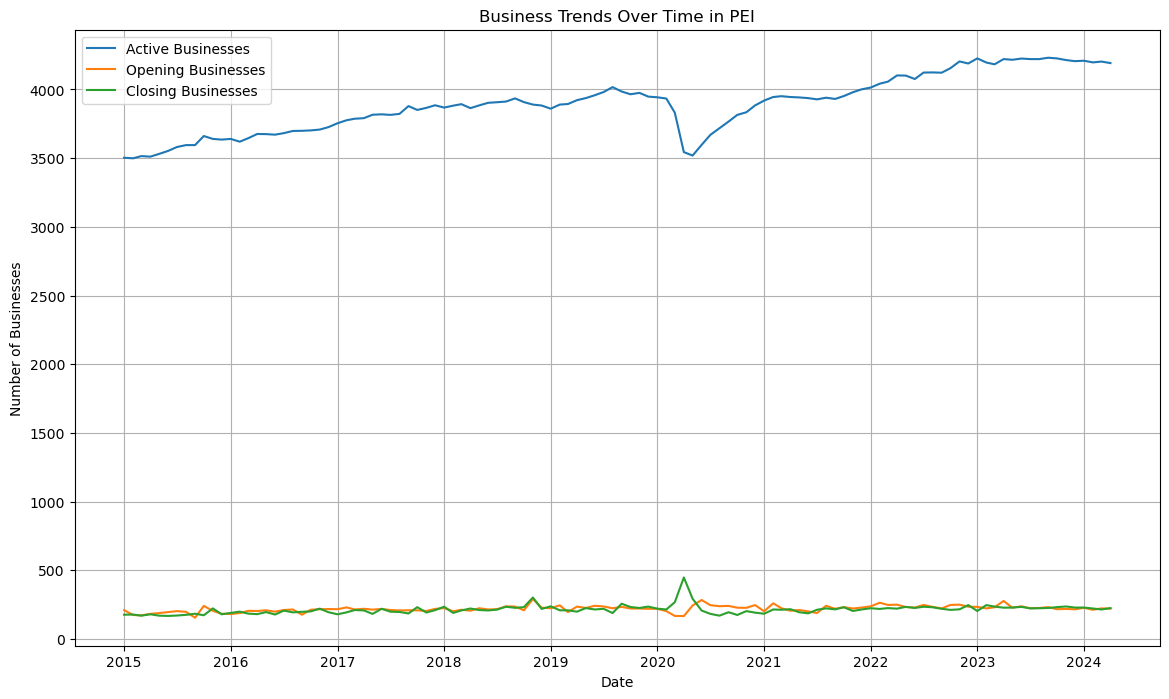

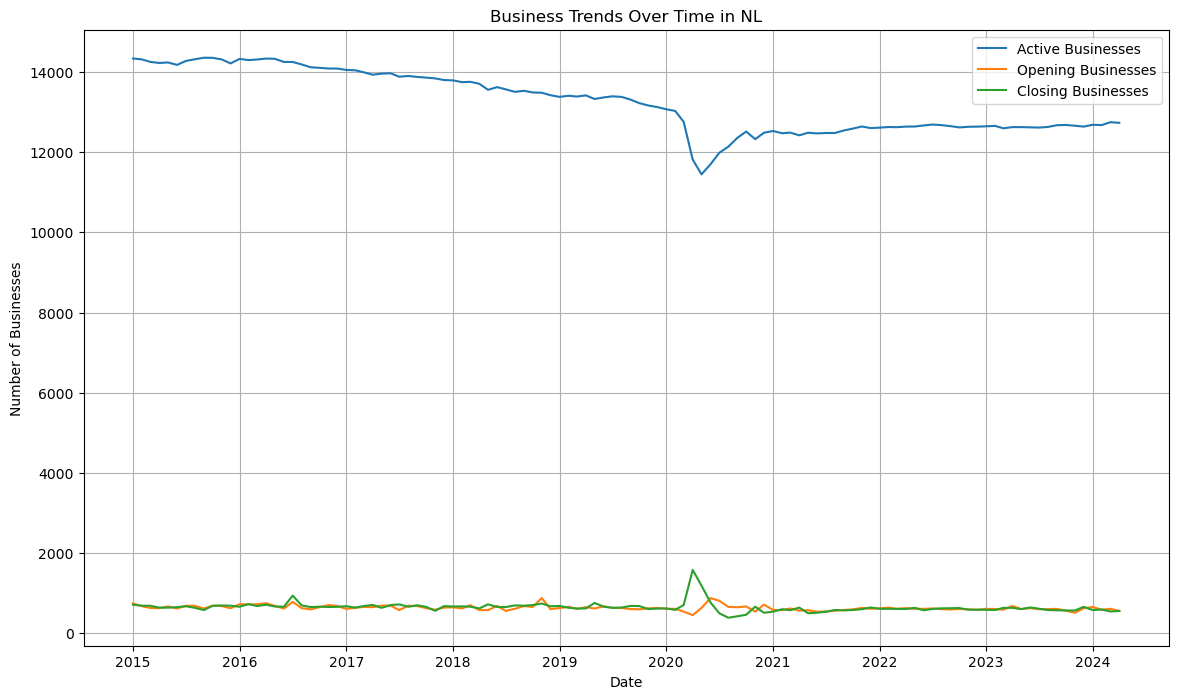

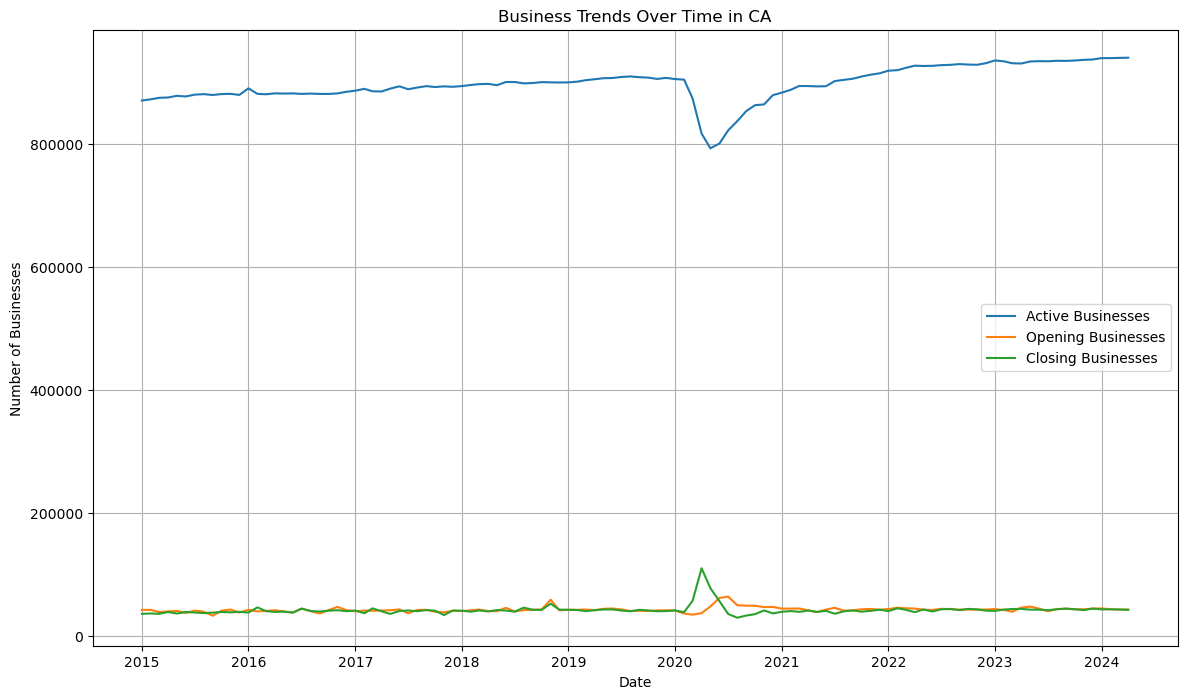

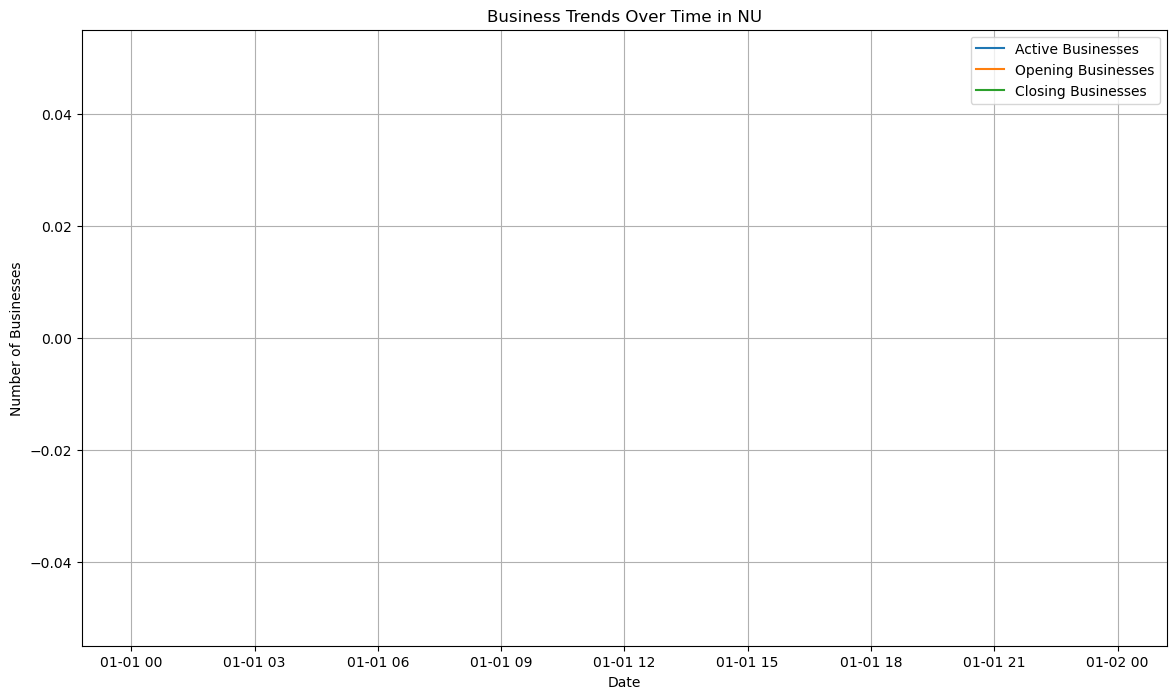

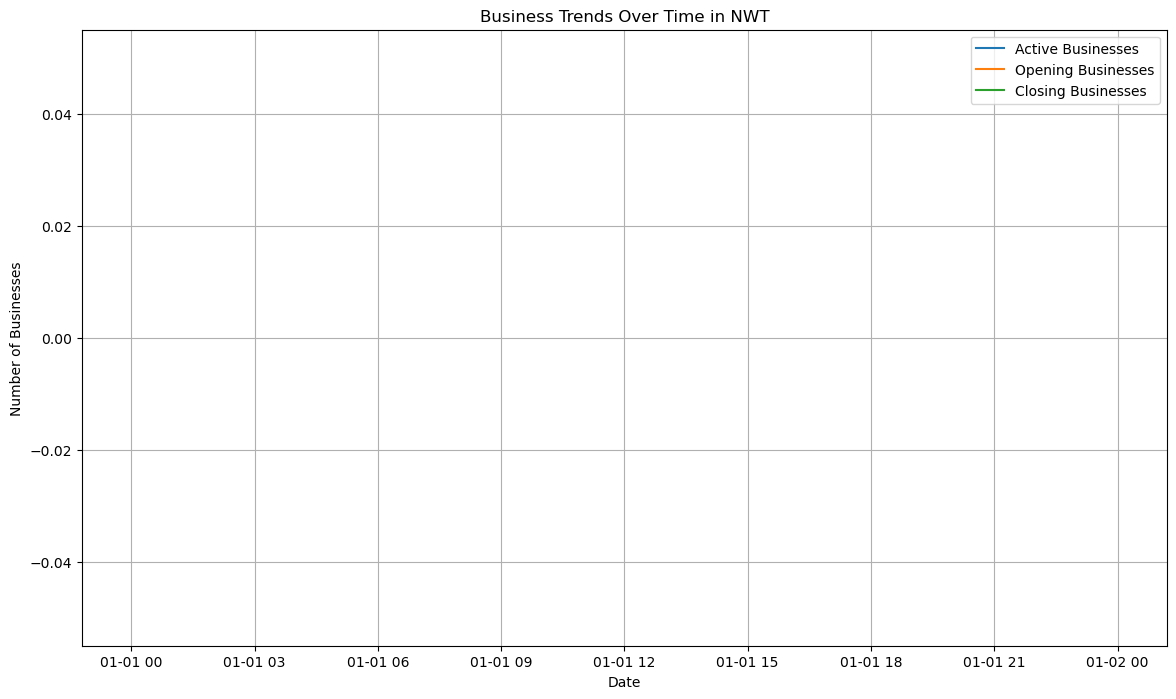

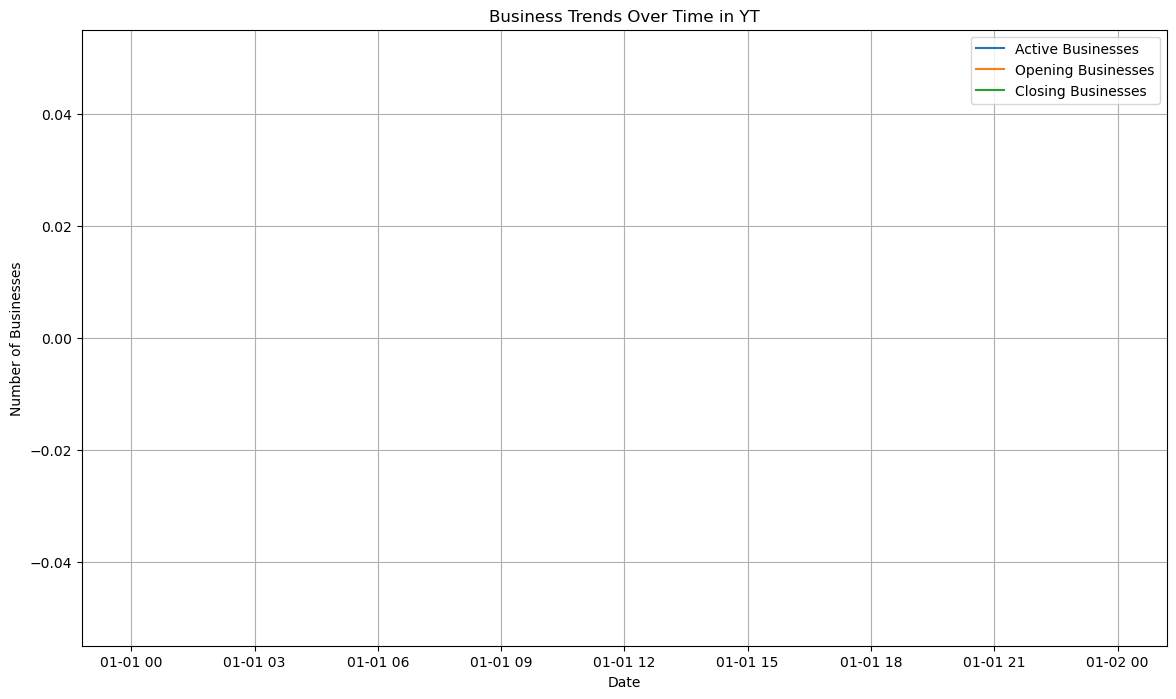

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from ProvinceMapping import ProvinceMapping, province_mapping

# Load the dataset
businesses_df = pd.read_csv('../data/processed/Businesses_Canada_provinces_2015_2024.csv')

# Convert the 'Active businesses', 'Opening businesses', and 'Closing businesses' columns to integer
businesses_df['Active businesses'] = businesses_df['Active businesses'].str.replace(',', '').astype(int)
businesses_df['Opening businesses'] = businesses_df['Opening businesses'].str.replace(',', '').astype(int)
businesses_df['Closing businesses'] = businesses_df['Closing businesses'].str.replace(',', '').astype(int)

# Convert the 'Date' column to datetime format
businesses_df['Date'] = pd.to_datetime(businesses_df['Date'], format='%y-%b')

# Transform the 'Geography' column to use abbreviations
transformer = ProvinceMapping(province_mapping)
businesses_df['Geography'] = businesses_df['Geography'].apply(transformer.province_map)

# Function to plot trends for a given province
def plot_trends_for_province(province):
    province_df = businesses_df[businesses_df['Geography'] == province].sort_values(by='Date')
    
    plt.figure(figsize=(14, 8))

    # Plot trend line for active businesses
    plt.plot(province_df['Date'], province_df['Active businesses'], label='Active Businesses')

    # Plot trend line for opening businesses
    plt.plot(province_df['Date'], province_df['Opening businesses'], label='Opening Businesses')

    # Plot trend line for closing businesses
    plt.plot(province_df['Date'], province_df['Closing businesses'], label='Closing Businesses')

    # Adding titles and labels
    plt.title(f'Business Trends Over Time in {province}')
    plt.xlabel('Date')
    plt.ylabel('Number of Businesses')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot trends for each province
for province in province_mapping.values():
    plot_trends_for_province(province)
